## Ujian Modul 3

## EDA

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report

In [93]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [149]:
df['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

Proporsi untuk customer yg cancel 44.224 lebih sedikit dibandingkan dengan tidak cancel sebanyak 75.166, ada kemugkinan terjadi imbalance

In [97]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


- Dari 119.390 total customer, rata-rata customer yg melakukan cancel booking sebesar 37.04%, dan lebih banyak stays in week nights.
- Nilai is canceled q1 : 0.000000, q2 : 0.000000, q3 : 1, dengan nilai iqr : 1

<AxesSubplot:>

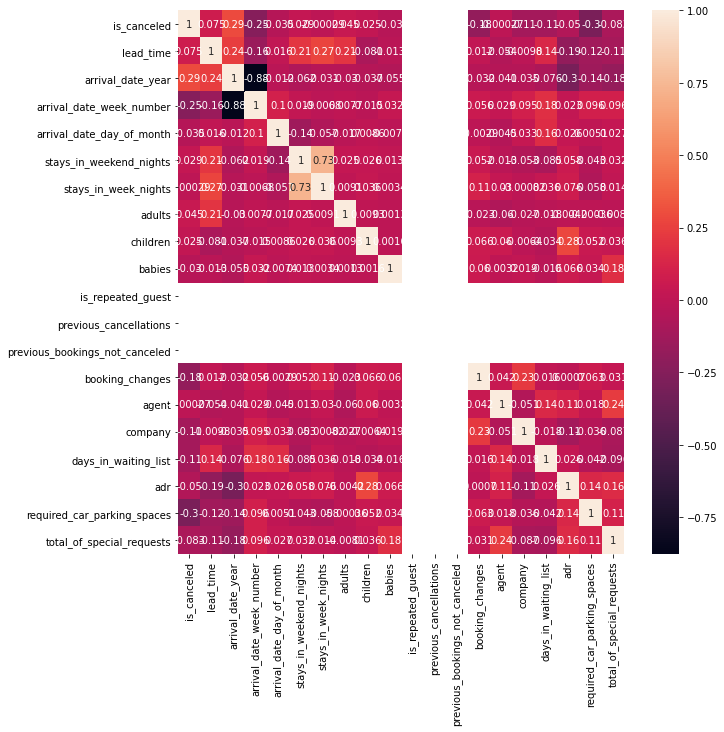

In [297]:
plt.figure(figsize=(10,10))
sns.heatmap(df[:5000].corr(),annot=True)

<AxesSubplot:xlabel='market_segment', ylabel='count'>

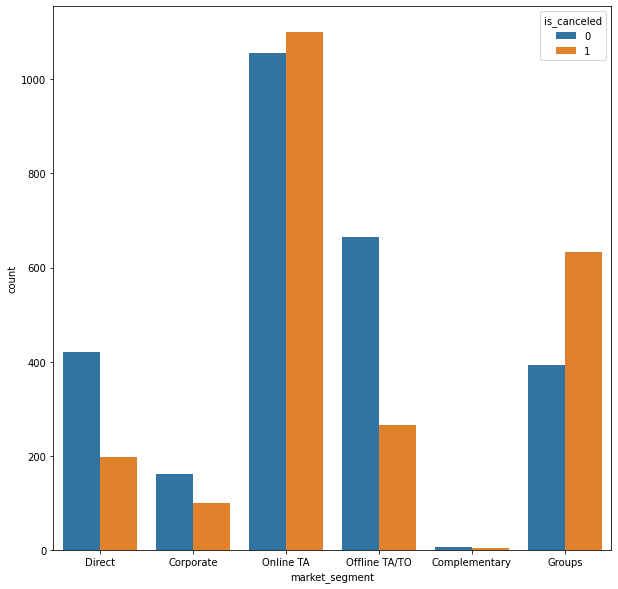

In [98]:
plt.figure(figsize=(10,10))
sns.countplot(x='market_segment',data=df[:5000],hue='is_canceled')

Berdasarkan 5000 data customer, market segment terbesar customer Online TA dan yg terkecil adalah dari complementary segment

<AxesSubplot:xlabel='hotel', ylabel='count'>

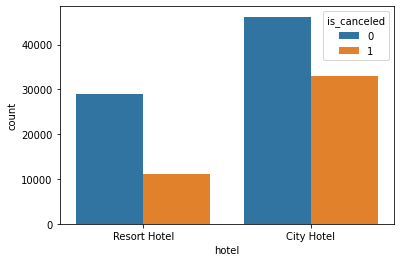

In [99]:
sns.countplot(x='hotel',data=df,hue='is_canceled')

Customer yg melakukan cancel utk city hotel lebih besar dibandingkan dengan resort hotel, dilihat dr countplot lebih dr 50% customer yg booked di city hotel melakukan cancel

<AxesSubplot:xlabel='reserved_room_type', ylabel='count'>

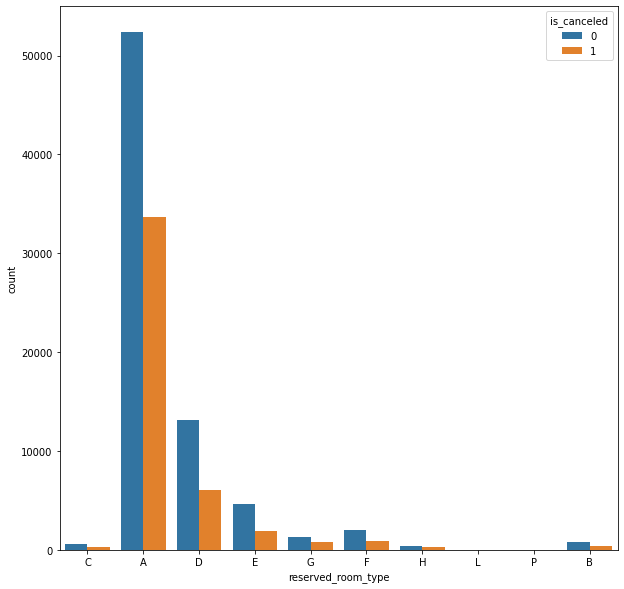

In [100]:
plt.figure(figsize=(10,10))
sns.countplot(x='reserved_room_type',data=df,hue='is_canceled')

Room type pemesanan terbesar customer ada di room A, diimbangi dengan tingkat cancel yg tinggi juga

## Data Cleaning & Preprocessing

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Data Cleaning >> 
Feature yg mengandung NaN :
- Childreen, agent, company : NaN diganti Mean
- Country : NaN diganti constant

Preprocessing :
- Hotel dan meal menggunakan OneHotEncoder karena nominal category dan utk generate column tidak banyak
- arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date menggunakan binary encoder karena banyak genarate column

Batasan Data untuk Ujian

- Ukuran data yang digunakan adalah 5000 baris (rows) awal [:5000].
- Variabel yang dipakai berjumlah 16 kolom, yaitu: ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']

Model yg digunakan :
- LogisticRegression : model regresi menggunakan probabilty dengan data bersifat kategori, yaitu dengan target is canceled : 0 utk tdk cancel dan 1 utk canceled
- Decision Tree Classifier : model dengan split true or false, menyerupai percabangan pohon 
- Random Forest Clasifier : model basis decision tree, sample acak dan feature terpilih jg acak, punya banyak pohon independent (jika decision tree semua feature dicek)


In [196]:
from sklearn.impute import SimpleImputer
imp_num=SimpleImputer(strategy='mean')
df[['children','agent','company']]= imp_num.fit_transform(df[['children','agent','company']])
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,189.266735,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,189.266735,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,189.266735,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.000000,189.266735,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.000000,189.266735,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.000000,189.266735,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.000000,189.266735,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [197]:
import category_encoders as ce
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
binary_pipe=Pipeline([
    ('imputer',SimpleImputer(strategy='constant', fill_value='NC')),
    ('encode', ce.BinaryEncoder())
])

transformer=ColumnTransformer([
    ('onehot',OneHotEncoder(drop='first'), ['hotel','meal']),
    ('binary',binary_pipe,['country','market_segment','distribution_channel','reserved_room_type','deposit_type','customer_type'])
    ], remainder='passthrough')

In [151]:
transformer.fit_transform(df) # test transformer

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


array([[1.0, 0.0, 0.0, ..., 0, 'Check-Out', '2015-07-01'],
       [1.0, 0.0, 0.0, ..., 0, 'Check-Out', '2015-07-01'],
       [1.0, 0.0, 0.0, ..., 0, 'Check-Out', '2015-07-02'],
       ...,
       [0.0, 0.0, 0.0, ..., 4, 'Check-Out', '2017-09-07'],
       [0.0, 0.0, 0.0, ..., 0, 'Check-Out', '2017-09-07'],
       [0.0, 0.0, 1.0, ..., 2, 'Check-Out', '2017-09-07']], dtype=object)

In [198]:
df1=df[:5000]
df1

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,189.266735,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,189.266735,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,189.266735,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Resort Hotel,1,212,2016,April,16,11,2,5,2,...,Non Refund,273.000000,189.266735,0,Transient,76.05,0,0,Canceled,2015-10-16
4996,Resort Hotel,1,212,2016,April,16,11,2,5,2,...,Non Refund,273.000000,189.266735,0,Transient,76.05,0,0,Canceled,2015-10-16
4997,Resort Hotel,1,212,2016,April,16,11,2,5,2,...,Non Refund,273.000000,189.266735,0,Transient,67.05,0,0,Canceled,2015-10-16
4998,Resort Hotel,1,212,2016,April,16,11,2,5,2,...,Non Refund,273.000000,189.266735,0,Transient,67.05,0,0,Canceled,2015-10-16


In [199]:
X=df1[['hotel','adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']]
y=df1[['is_canceled']]

In [200]:
X_train, X_test, y_train, y_test= train_test_split(X,y,
    test_size=.3,
    stratify=y,
    random_state=2020)

In [201]:
X_train_preprocessed=transformer.fit_transform(X_train)
X_test_preprocessed=transformer.transform(X_test)

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [202]:
X_train_preprocessed=pd.DataFrame(X_train_preprocessed)
X_test_preprocessed=pd.DataFrame(X_test_preprocessed)

In [203]:
transformer.transformers_

[('onehot', OneHotEncoder(drop='first'), ['hotel', 'meal']),
 ('binary',
  Pipeline(steps=[('imputer',
                   SimpleImputer(fill_value='NC', strategy='constant')),
                  ('encode', BinaryEncoder())]),
  ['country',
   'market_segment',
   'distribution_channel',
   'reserved_room_type',
   'deposit_type',
   'customer_type']),
 ('remainder', 'passthrough', [1, 2, 3, 9, 11, 13, 14])]

In [204]:
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1]['encode'].get_feature_names() + ['adults','children', 'babies','booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']
features


['x1_FB',
 'x1_HB',
 'x1_SC',
 'x1_Undefined',
 '0_0',
 '0_1',
 '0_2',
 '0_3',
 '0_4',
 '0_5',
 '0_6',
 '1_0',
 '1_1',
 '1_2',
 '1_3',
 '2_0',
 '2_1',
 '2_2',
 '3_0',
 '3_1',
 '3_2',
 '3_3',
 '3_4',
 '4_0',
 '4_1',
 '4_2',
 '5_0',
 '5_1',
 '5_2',
 'adults',
 'children',
 'babies',
 'booking_changes',
 'days_in_waiting_list',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [205]:
X_train_preprocessed.columns = features
X_test_preprocessed.columns = features
X_train_preprocessed

,x1_FB,x1_HB,x1_SC,x1_Undefined,0_0,0_1,0_2,0_3,0_4,0_5,...,5_0,5_1,5_2,adults,children,babies,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,2.0,2.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
3497,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score
from sklearn.metrics import accuracy_score
logreg = LogisticRegression()
tree = DecisionTreeClassifier(max_depth=3, random_state=2020)
rf= RandomForestClassifier(max_depth=3, random_state=2020)


In [166]:
model1= DecisionTreeClassifier(max_depth=3)
model1.fit(X_train_preprocessed,y_train)
y_pred=model1.predict(X_test_preprocessed)
accuracy_score(y_test,y_pred)

0.7523522349722199

In [192]:
logreg_pipe=Pipeline([
    ('transformer', transformer),
    ('logreg',logreg)
])
tree_pipe=Pipeline([
    ('transformer', transformer),
    ('tree',tree)
])
rf_pipe=Pipeline([
    ('transformer', transformer),
    ('rf',rf)
])

def model_evaluation(model, metric):
    skfold= StratifiedKFold(n_splits=5)
    model_cv= cross_val_score(model, X_train_preprocessed, y_train, cv= skfold, scoring=metric)
    return model_cv



In [207]:
logreg_pipe_cv= model_evaluation(logreg,'recall')
tree_pipe_cv= model_evaluation(tree,'recall')
rf_pipe_cv= model_evaluation(rf,'recall')

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solv

In [209]:
for model in (logreg_pipe, tree_pipe, rf_pipe):
    model.fit(X_train, y_train)

score_mean = [logreg_pipe_cv.mean(), tree_pipe_cv.mean(), rf_pipe_cv.mean()]
score_std = [logreg_pipe_cv.std(), tree_pipe_cv.std(), rf_pipe_cv.std()]

score_recall = [recall_score(y_test, logreg_pipe.predict(X_test)),
    recall_score(y_test, tree_pipe.predict(X_test)),
    recall_score(y_test, rf_pipe.predict(X_test))]

method_name = ['Logistic Regression', 'Decision Tree Classifier', 'Random Forest Classifier']

cv_summary = pd.DataFrame({
    'method' : method_name,
    'mean score' : score_mean,
    'std score' : score_std,
    'recall score' : score_recall
})

cv_summary

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed i

,method,mean score,std score,recall score
0,Logistic Regression,0.937223,0.014646,0.923077
1,Decision Tree Classifier,0.979493,0.006387,0.968070
2,Random Forest Classifier,0.972030,0.012113,0.969521


Jenis kesalahan yang paling berpengaruh pada kerugian finansial perusahaan adalah apabila prediksi dalam kasus ini, jika customer diprediksi tidak cancel, ternyata cancel, maka perusahaan akan rugi karena persiapan yg sdh dilakukan utk menyambut konsumen gagal karena cancel dan tidak mendapatkan uang pemasukan. (FN) sehingga metric evaluasi yang seharusnya kita pakai adalah ** Recall**

Nilai Recall yg paling besar adalah dengan menggunakn model Random Forest Classifier sebesar 0.970 tetapi nilai std error nya 0.012 paling besar.

Sehingga dalam kasus ini dipilih **metode Decision Tree Classifier**, karena nilai recall score terbesar kedua dan std error paling kecil

## Hyperparameter Tunning

In [248]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import NearMiss, RandomUnderSampler
from sklearn.metrics import mean_squared_error

In [287]:
hyperparam_space={
    'tree__min_samples_leaf':[1,5,10,15,20,50],
    'tree__max_depth':[2,3,4,5,6,7]}

In [289]:
random_search= RandomizedSearchCV(
    tree_pipe, #model
    param_distributions=hyperparam_space, #parameter yg ingin ditunning
    n_iter=20, #berapa random parameter yang dicoba
    cv= 5,
    scoring='recall', #metric
    random_state=2020)

In [290]:
random_search.fit(X_train,y_train)

py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
C:\Users\201625765\AppData\L

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['hotel',
                                                                                'meal']),
                                                                              ('binary',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(fill_value='NC',
                                                                                                              strategy='consta

In [291]:
print('best score :', random_search.best_score_)
print('best param: ', random_search.best_params_)

best score : 0.9832220738762796
best param:  {'tree__min_samples_leaf': 1, 'tree__max_depth': 4}


In [293]:
random_search.best_estimator_.fit(X_train,y_train)
recall_score(y_test,random_search.best_estimator_.predict(X_test))

C:\Users\201625765\AppData\Local\Programs\Python\Python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


0.9753265602322206

Score after tunning

In [294]:
print(classification_report(y_test,random_search.best_estimator_.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.69      0.81       811
           1       0.73      0.98      0.83       689

    accuracy                           0.82      1500
   macro avg       0.85      0.83      0.82      1500
weighted avg       0.86      0.82      0.82      1500



Score before tunning

In [295]:
print(classification_report(y_test,estimator.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86       811
           1       0.82      0.86      0.84       689

    accuracy                           0.85      1500
   macro avg       0.85      0.85      0.85      1500
weighted avg       0.85      0.85      0.85      1500



Dilakukan hyperparameter tunning dengan metode randomized search : pengambilan data secara random, dengan banyaknya iterasi adalah 20 dan cv 5.

Setelah dilakukan hyperparameter tunning, score recall menjadi lebih tinggi yaitu 0.98, bertambah 0.12, Sehingga model terbaik adalah Decision Tree Classifier dengan randomized search.